In [1]:
import numpy as np

In [8]:
X = np.array([[18], [23], [28], [33], [38], [43], [48], [53], [63]])
y = np.array([[871], [1042], [1132], [1356], [1488], [1638], [1569], [1754], [1866]])

### Pré-processing

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
X

/home/dstrb/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/dstrb/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.48595576],
       [-1.12450706],
       [-0.76305836],
       [-0.40160966],
       [-0.04016097],
       [ 0.32128773],
       [ 0.68273643],
       [ 1.04418513],
       [ 1.76708252]])

In [11]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)
y

/home/dstrb/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/dstrb/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.6988579 ],
       [-1.16276147],
       [-0.88060545],
       [-0.17835047],
       [ 0.23547836],
       [ 0.70573839],
       [ 0.48941877],
       [ 1.06940614],
       [ 1.42053363]])

### Gráfico

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

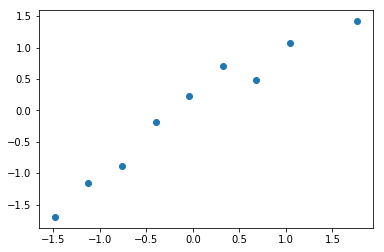

In [13]:
# o mesmo da aula passada
plt.scatter(X, y)

### Reg. Linear
Fórmula = b0 + b1 * x

In [14]:
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [15]:
import tensorflow as tf

In [16]:
# início dos valores antes ser alterado
b0 = tf.Variable(0.54)
b1 = tf.Variable(0.71)

In [17]:
erro = tf.losses.mean_squared_error(y, (b0 + b1) * X) # função de custo e perda
otimizador = tf.train.GradientDescentOptimizer(learning_rate=0.001)
treinamento = otimizador.minimize(erro) # minimiza o erro
init = tf.global_variables_initializer()

In [18]:
with tf.Session() as sess:
    sess.run(init)
#     print(sess.run(b0))
#     print(sess.run(b1))
    
    # quantidade de épocas
    for i in range(1000):
        sess.run(treinamento)
        
    b0_final, b1_final = sess.run([b0, b1])

In [19]:
b0_final, b1_final # valores finais

(0.40384355, 0.5738439)

### Previsões

In [20]:
previsoes = b0_final + b1_final * X
previsoes

array([[-0.44886309],
       [-0.24144796],
       [-0.03403283],
       [ 0.1733823 ],
       [ 0.38079743],
       [ 0.58821256],
       [ 0.79562768],
       [ 1.00304281],
       [ 1.41787307]])

### Gráfico 1.1

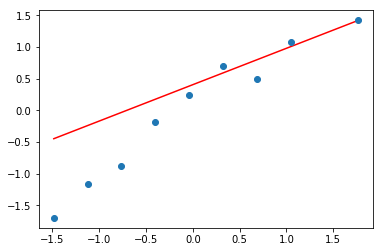

In [21]:
plt.plot(X, previsoes, color='red')
plt.plot(X, y, 'o')

In [25]:
scaler_x.transform([[40]])

array([[0.10441851]])

In [27]:
previsao = scaler_y.inverse_transform(b0_final + b1_final * scaler_x.transform([[40]]))
previsao

array([[1560.81666771]])